• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle

1. Data Understanding & Exploration:
A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
df_cars=pd.read_csv("Car name.csv")
df_cars.shape

(398, 1)

B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [3]:
df = pd.read_json("Car-Attributes.json")
df.shape

(398, 8)

C. Merge both the DataFrames together to form a single DataFrame

In [4]:
df= pd.concat([df_cars, df], axis=1, ignore_index=False,verify_integrity=True)
df.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

Print 5 point summary of the numerical features and share insights.

In [5]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [6]:
df.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

From the five point Summary it can be inferred that there are some outliers in the data in the case of displacement weight and mpg

# 2. Data Preparation & Analysis: 
A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [7]:
NullValues=df.isnull().sum()/len(df)
NullValues*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

B. Check for duplicate values in the data and impute with the best suitable approach.

In [8]:
df.duplicated().sum()

0

In [9]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [10]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [11]:
df['disp'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [12]:
df['hp'].drop_duplicates()

0      130
1      165
2      150
4      140
5      198
      ... 
338     84
344     64
353     74
361    116
397     82
Name: hp, Length: 94, dtype: object

In [13]:
df['wt'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [14]:
df['acc'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [15]:
df['hp'].replace("?",np.nan, inplace=True)
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [16]:
import seaborn as sns
hp = df['hp'].dropna()
hp.count()

392

C:\Users\vrooky-montzo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

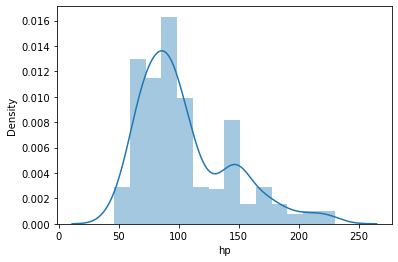

In [17]:
sns.distplot(pd.to_numeric(hp))

In [18]:
# Since this does not look to be normally distributed, let us impute by using median
df['hp'].fillna((df['hp'].median()), inplace=True)


Plot a pairplot for all features

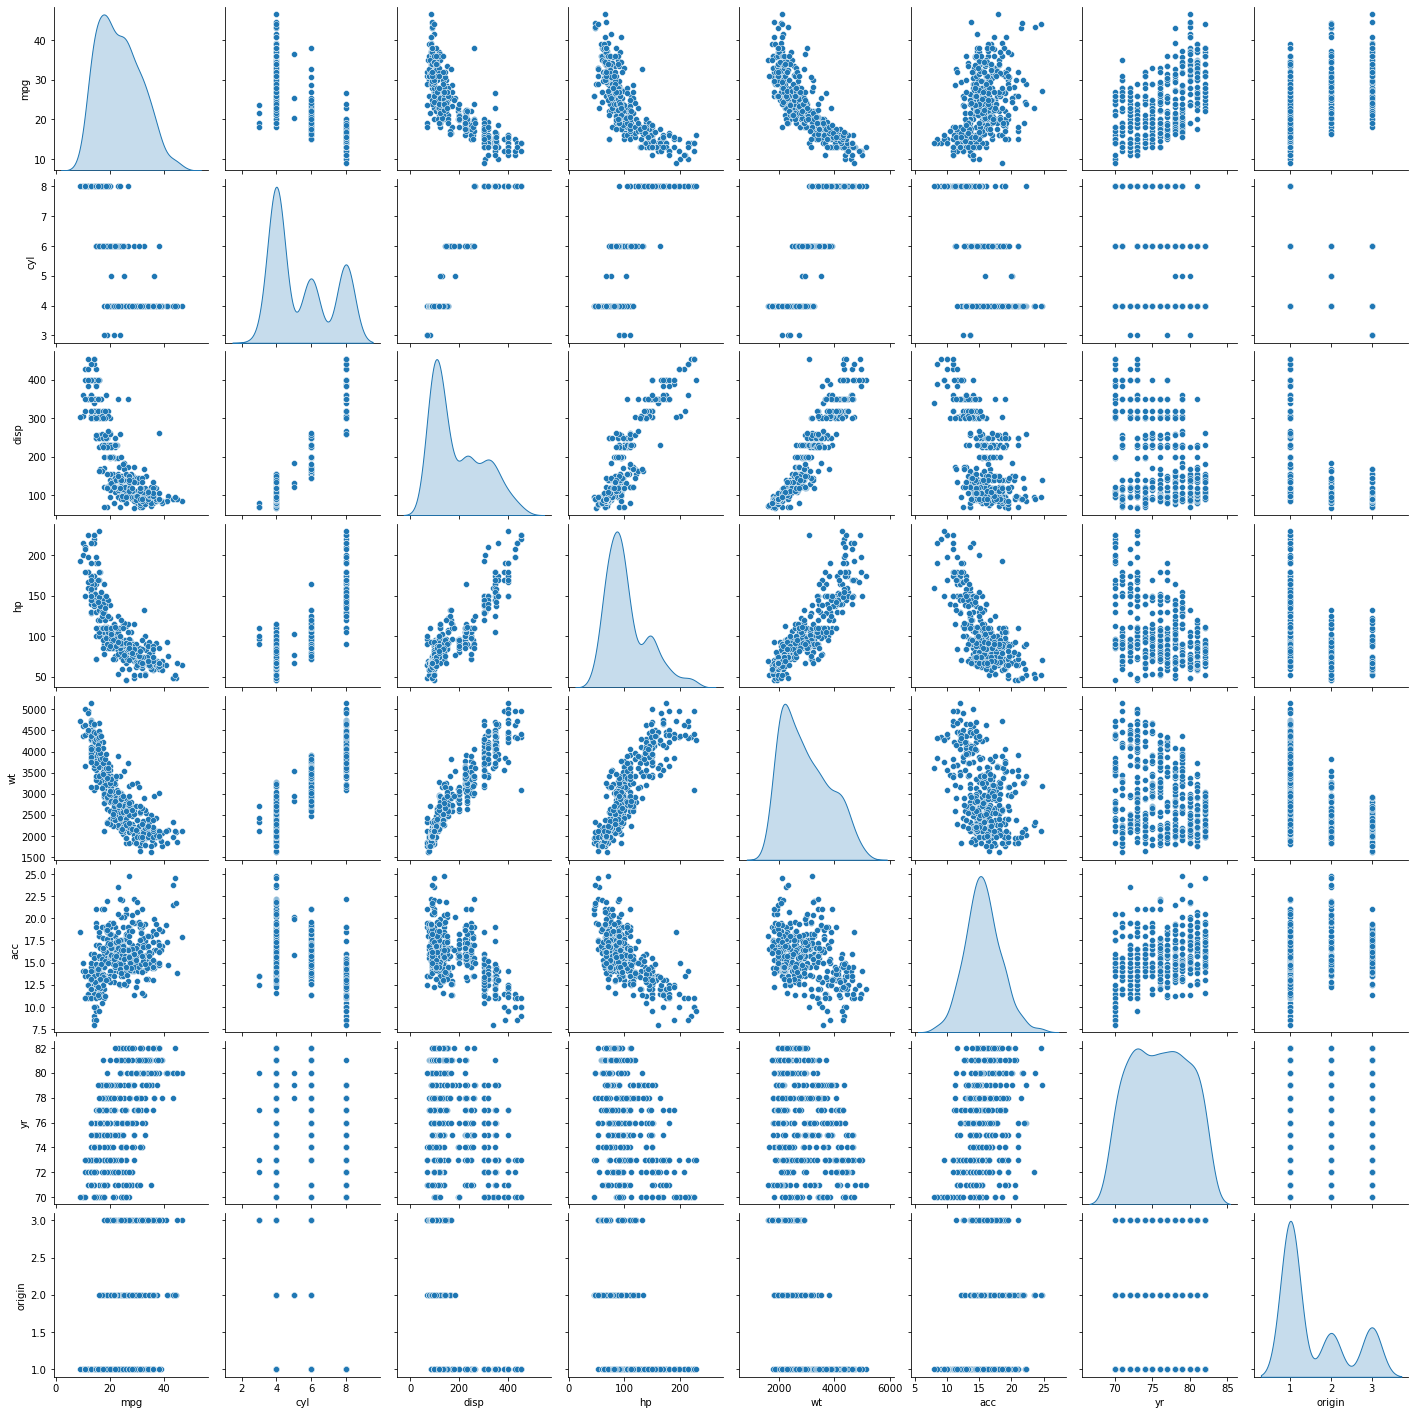

In [19]:
sns.pairplot(df,diag_kind="kde")

The observations from pairplot diagonal kde plot depicts that there is at least three classes of labels within the dataset. 
some features are related to each other linearly while some others are independant.
though vague, mpg shows two peaks.cyl shows three peaks.disp and origin are also triple modal. yr shows two peaks with a slight dip in between.disp and hp shows linearity while yr/ age is almost not affecting other features. so they could be dropped for building the model.

Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='disp'>

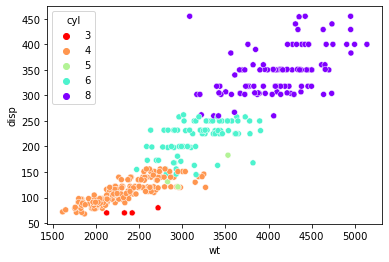

In [20]:
sns.scatterplot(x = 'wt',
                y = 'disp',
                hue ='cyl',
                palette='rainbow_r',
               data=df)

In [21]:
df.groupby(df['cyl']).count()

car_name  mpg  disp   hp   wt  acc   yr  origin
cyl                                                 
3           4    4     4    4    4    4    4       4
4         204  204   204  204  204  204  204     204
5           3    3     3    3    3    3    3       3
6          84   84    84   84   84   84   84      84
8         103  103   103  103  103  103  103     103

In [22]:
df.groupby(df['origin']).count()

car_name  mpg  cyl  disp   hp   wt  acc   yr
origin                                              
1            249  249  249   249  249  249  249  249
2             70   70   70    70   70   70   70   70
3             79   79   79    79   79   79   79   79

Share insights for Q2.d.

The Cylinders of Cars seem to be having 5 different classes according to which the numerical values of lineraly related wt and disp are classified. based on the class cylinders the displacements seem to be almost constant. As the weight increases disp also increases.

Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

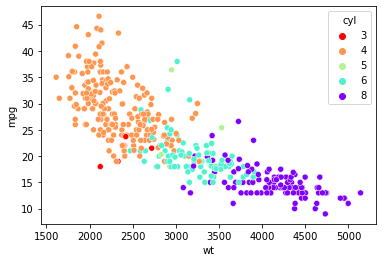

In [23]:
sns.scatterplot(x = 'wt',
                y = 'mpg',
                hue ='cyl',
                palette='rainbow_r',
               data=df)

Here we see an inverse linear relationship between mpg and weight. A good vehicle with high mpg will be having less weight. Highest Mpg is given by vehicles with 4 cylinders (orange dots) and the lowest mpg are given by 8 cylindered vehicles.Majority of cars come with 8,6 and 4 cylinders. those with 8 cylinders are 

Check for unexpected values in all the features and datapoints with such values. 

In [24]:
df[df['hp']=="?"]

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []

In [25]:
df['hp'].replace("?",np.nan, inplace=True)
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

# 3. Clustering:  

Apply K-Means clustering for 2 to 10 clusters. Before that we need to perform some feature changes.

In [26]:
#origin  is a categorical variable which does not seem to be giving a clearer notion of cars.
#we have to scale numerical columns before applying K_Means
#yr column can be dropped as it is not affecting the number of datapoints in the year of manufacture
#check for outliers

In [27]:

df.groupby(df['yr']).count()

car_name  mpg  cyl  disp  hp  wt  acc  origin
yr                                               
70        29   29   29    29  29  29   29      29
71        28   28   28    28  28  28   28      28
72        28   28   28    28  28  28   28      28
73        40   40   40    40  40  40   40      40
74        27   27   27    27  27  27   27      27
75        30   30   30    30  30  30   30      30
76        34   34   34    34  34  34   34      34
77        28   28   28    28  28  28   28      28
78        36   36   36    36  36  36   36      36
79        29   29   29    29  29  29   29      29
80        29   29   29    29  29  29   29      29
81        29   29   29    29  29  29   29      29
82        31   31   31    31  31  31   31      31

In [28]:
# Let us now remove duplicate/irrelevant columns
#K-means cannot be directly used for data with both numerical and categorical values because of the cost function it uses. 
#K-means uses Euclidean distance, which is not defined for categorical data so encoding 'origin' and 'cyl' and column.

df_new = df.drop(['yr','car_name'], axis =1)

df_new.head()



mpg  cyl   disp     hp    wt   acc  origin
0  18.0    8  307.0  130.0  3504  12.0       1
1  15.0    8  350.0  165.0  3693  11.5       1
2  18.0    8  318.0  150.0  3436  11.0       1
3  16.0    8  304.0  150.0  3433  12.0       1
4  17.0    8  302.0  140.0  3449  10.5       1

In [29]:
dummies = pd.get_dummies(df_new['origin'])
dummies = dummies.add_prefix('origin_')

# merge in main data frame
df_new = df_new.join(dummies)
df_new.head()

mpg  cyl   disp     hp    wt   acc  origin  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0       1         1         0         0
1  15.0    8  350.0  165.0  3693  11.5       1         1         0         0
2  18.0    8  318.0  150.0  3436  11.0       1         1         0         0
3  16.0    8  304.0  150.0  3433  12.0       1         1         0         0
4  17.0    8  302.0  140.0  3449  10.5       1         1         0         0

In [30]:

dummies2=pd.get_dummies(df_new.cyl)
dummies2 = dummies2.add_prefix('cyl_')

df_new = df_new.join(dummies2)
df_new.head()

mpg  cyl   disp     hp    wt   acc  origin  origin_1  origin_2  origin_3  \
0  18.0    8  307.0  130.0  3504  12.0       1         1         0         0   
1  15.0    8  350.0  165.0  3693  11.5       1         1         0         0   
2  18.0    8  318.0  150.0  3436  11.0       1         1         0         0   
3  16.0    8  304.0  150.0  3433  12.0       1         1         0         0   
4  17.0    8  302.0  140.0  3449  10.5       1         1         0         0   

   cyl_3  cyl_4  cyl_5  cyl_6  cyl_8  
0      0      0      0      0      1  
1      0      0      0      0      1  
2      0      0      0      0      1  
3      0      0      0      0      1  
4      0      0      0      0      1

In [31]:
df_final = df_new.drop(['origin','origin_1','cyl','cyl_3'], axis =1)

df_final.head()


mpg   disp     hp    wt   acc  origin_2  origin_3  cyl_4  cyl_5  cyl_6  \
0  18.0  307.0  130.0  3504  12.0         0         0      0      0      0   
1  15.0  350.0  165.0  3693  11.5         0         0      0      0      0   
2  18.0  318.0  150.0  3436  11.0         0         0      0      0      0   
3  16.0  304.0  150.0  3433  12.0         0         0      0      0      0   
4  17.0  302.0  140.0  3449  10.5         0         0      0      0      0   

   cyl_8  
0      1  
1      1  
2      1  
3      1  
4      1

In [32]:
#checking for outliers in continuous variables

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec1d569c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec1d5723a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec1d5698b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec1d572ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec1d572e50>],
 'means': []}

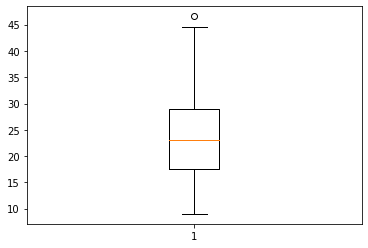

In [33]:
# some outliers are there for mpg,hp and acc
plt.boxplot(df_final['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec1d5ce610>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec1d5ced30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec1d5ce280>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec1d5d8490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec1d5d8820>],
 'means': []}

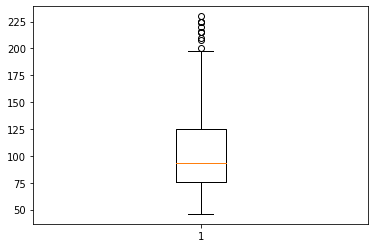

In [34]:
plt.boxplot(df_final['hp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec1d62dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec1d63d4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec1d62da00>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec1d63dc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec1d63dfa0>],
 'means': []}

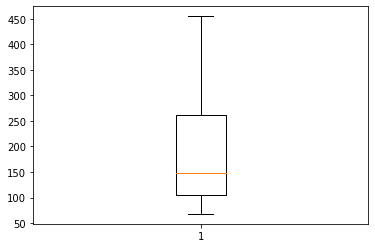

In [35]:
plt.boxplot(df_final['disp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec1d6a0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec1d6ad310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec1d6a07f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec1d6ada30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec1d6addc0>],
 'means': []}

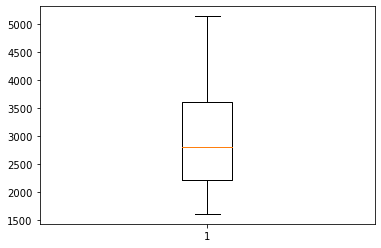

In [36]:
plt.boxplot(df_final['wt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec1e6e6460>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec1e6e6b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec1e6e60d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec1e6f12e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec1e6f1670>],
 'means': []}

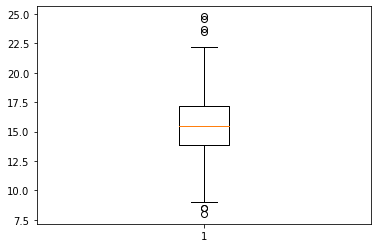

In [37]:
plt.boxplot(df_final['acc'])

In [38]:
#'mpg','hp','acc ' are having outliers so removing them using log transformation to those features alone
df_final['hp'] = np.log(df_final['hp'])
df_final['acc'] = np.log(df_final['acc'])
df_final['mpg'] = np.log(df_final['mpg'])

df_final.head()

mpg   disp        hp    wt       acc  origin_2  origin_3  cyl_4  \
0  2.890372  307.0  4.867534  3504  2.484907         0         0      0   
1  2.708050  350.0  5.105945  3693  2.442347         0         0      0   
2  2.890372  318.0  5.010635  3436  2.397895         0         0      0   
3  2.772589  304.0  5.010635  3433  2.484907         0         0      0   
4  2.833213  302.0  4.941642  3449  2.351375         0         0      0   

   cyl_5  cyl_6  cyl_8  
0      0      0      1  
1      0      0      1  
2      0      0      1  
3      0      0      1  
4      0      0      1

In [39]:
#Apply K-Means clustering for 2 to 10 clusters
#Scaling should be done before that
# scale features

df_Scaled=df_final.apply(zscore)
df_Scaled.head()

mpg      disp        hp        wt       acc  origin_2  origin_3  \
0 -0.622035  1.090604  0.823608  0.630870 -1.353748 -0.461968 -0.497643   
1 -1.159493  1.503514  1.523992  0.854333 -1.589535 -0.461968 -0.497643   
2 -0.622035  1.196232  1.243998  0.550470 -1.835805 -0.461968 -0.497643   
3 -0.969242  1.061796  1.243998  0.546923 -1.353748 -0.461968 -0.497643   
4 -0.790530  1.042591  1.041316  0.565841 -2.093533 -0.461968 -0.497643   

      cyl_4     cyl_5     cyl_6     cyl_8  
0 -1.025449 -0.087149 -0.517219  1.692359  
1 -1.025449 -0.087149 -0.517219  1.692359  
2 -1.025449 -0.087149 -0.517219  1.692359  
3 -1.025449 -0.087149 -0.517219  1.692359  
4 -1.025449 -0.087149 -0.517219  1.692359

In [40]:
#acc  shows outliers again which we can ignore.

In [41]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)

In [42]:
# Fit K means on the scaled_df
k_means.fit(df_Scaled)

KMeans(n_clusters=2)

In [43]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_Scaled)
k_means.inertia_

1698.7479076389561

In [44]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_Scaled)
k_means.inertia_

1275.3147637607335

In [45]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_Scaled)
k_means.inertia_

896.6002518786175

WSS reduces as K keeps increasing 

C:\Users\vrooky-montzo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


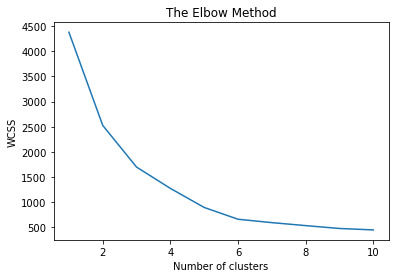

In [46]:
#Apply K-Means clustering for 2 to 10 clusters
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(df_Scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
# On the above visual, highlight which are the possible Elbow points. 
# We could see the bend at 3,4,5
#Train a K-means clustering model once again on the optimal number of clusters.

 KMeans with K=3

In [48]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_Scaled)
labels1 = k_means.labels_

In [49]:
# Calculating silhouette_score
silhouette_score(df_Scaled,labels1)

0.48002460337732955

In [50]:
#KMeans with K=4
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(df_Scaled)
labels2 = k_means.labels_

In [51]:
silhouette_score(df_Scaled,labels2)

0.5009619836806646

In [52]:
#KMeans with K=5
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(df_Scaled)
labels3 = k_means.labels_

In [53]:
silhouette_score(df_Scaled,labels3)

0.509332580433742

Silhouette_score is seen to be better for k =5, 0.509. so we go for grouping into five clusters.

In [54]:
#Add a new feature in the DataFrame which will have labels based upon cluster value.
#Appending Clusters to the original dataset
df_Scaled["Clus_kmeans5"] = labels3
df_Scaled.head()



mpg      disp        hp        wt       acc  origin_2  origin_3  \
0 -0.622035  1.090604  0.823608  0.630870 -1.353748 -0.461968 -0.497643   
1 -1.159493  1.503514  1.523992  0.854333 -1.589535 -0.461968 -0.497643   
2 -0.622035  1.196232  1.243998  0.550470 -1.835805 -0.461968 -0.497643   
3 -0.969242  1.061796  1.243998  0.546923 -1.353748 -0.461968 -0.497643   
4 -0.790530  1.042591  1.041316  0.565841 -2.093533 -0.461968 -0.497643   

      cyl_4     cyl_5     cyl_6     cyl_8  Clus_kmeans5  
0 -1.025449 -0.087149 -0.517219  1.692359             1  
1 -1.025449 -0.087149 -0.517219  1.692359             1  
2 -1.025449 -0.087149 -0.517219  1.692359             1  
3 -1.025449 -0.087149 -0.517219  1.692359             1  
4 -1.025449 -0.087149 -0.517219  1.692359             1

In [55]:
#Cluster Profiling
df_Scaled.Clus_kmeans5.value_counts().sort_index()

0    135
1    102
2     85
3     73
4      3
Name: Clus_kmeans5, dtype: int64

In [56]:
#the fifth cluster is very few while substantial amount of data got clustered into other four clusters.

Plot a visual and color the datapoints based upon clusters.

In [57]:
X=df_Scaled
X.head()


mpg      disp        hp        wt       acc  origin_2  origin_3  \
0 -0.622035  1.090604  0.823608  0.630870 -1.353748 -0.461968 -0.497643   
1 -1.159493  1.503514  1.523992  0.854333 -1.589535 -0.461968 -0.497643   
2 -0.622035  1.196232  1.243998  0.550470 -1.835805 -0.461968 -0.497643   
3 -0.969242  1.061796  1.243998  0.546923 -1.353748 -0.461968 -0.497643   
4 -0.790530  1.042591  1.041316  0.565841 -2.093533 -0.461968 -0.497643   

      cyl_4     cyl_5     cyl_6     cyl_8  Clus_kmeans5  
0 -1.025449 -0.087149 -0.517219  1.692359             1  
1 -1.025449 -0.087149 -0.517219  1.692359             1  
2 -1.025449 -0.087149 -0.517219  1.692359             1  
3 -1.025449 -0.087149 -0.517219  1.692359             1  
4 -1.025449 -0.087149 -0.517219  1.692359             1

In [58]:
k_means = KMeans(n_clusters = 5)
k_model=k_means.fit(df_Scaled)
df_kmeans = kmeans.fit_transform(X)
 
k_model

KMeans(n_clusters=5)

In [59]:
kmeans = KMeans(n_clusters= 5)
 #predict the labels of clusters.
label = kmeans.fit_predict(df_kmeans)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 0, 3, 2, 3, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 3, 2,
       3, 3, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 3, 2, 3,
       2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 3, 2, 1, 2, 3, 2, 3, 1, 2,
       1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       3, 1, 1, 1, 1, 2, 3, 3, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 3, 2, 2, 2,
       3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 3, 2, 1,
       2, 3, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 2, 3, 3, 2, 3, 2, 2, 3, 4, 1, 2, 1, 2, 3, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 4, 0, 2, 1,

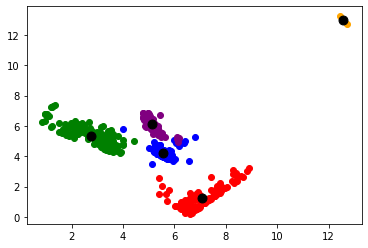

In [60]:
#Getting the Centroids
centroids = kmeans.cluster_centers_

filtered_label0= df_kmeans[label == 0]

filtered_label1 = df_kmeans[label == 1]

filtered_label2 = df_kmeans[label == 2]

filtered_label3 = df_kmeans[label == 3]

filtered_label4 = df_kmeans[label == 4]
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'purple')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'orange')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.show()



The three cluster in 3 different colurs and centroids with black dot is obtained. 

Pass a new DataPoint and predict which cluster it belongs to.

In [61]:
Pickled = pickle.dumps(k_model) 
    
Pickled_Load = pickle.loads(Pickled)
X_test = [(0.5,1,2,0,0.8,2,3,1,0,0,0,0)]
label = Pickled_Load.predict(X_test)
label

array([0])

In [62]:
d = {'car_name' : df['car_name'],'yr' : df['yr']}
df1 = pd.DataFrame(data=d)

df_Scaled = pd.concat([df_Scaled,df1],axis=1)
df_Scaled.head(2)

mpg      disp        hp        wt       acc  origin_2  origin_3  \
0 -0.622035  1.090604  0.823608  0.630870 -1.353748 -0.461968 -0.497643   
1 -1.159493  1.503514  1.523992  0.854333 -1.589535 -0.461968 -0.497643   

      cyl_4     cyl_5     cyl_6     cyl_8  Clus_kmeans5  \
0 -1.025449 -0.087149 -0.517219  1.692359             1   
1 -1.025449 -0.087149 -0.517219  1.692359             1   

                    car_name  yr  
0  chevrolet chevelle malibu  70  
1          buick skylark 320  70